In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.max_rows = 20

from soma.aims.lazy_read_data import LazyReadData
from soma import aims

In [55]:
def count_voxels(data_dir_path, dtype='skel'):
    count_voxels_dict = {}

    for i,file in enumerate(os.listdir(data_dir_path)):
        if file.endswith(".nii.gz"):
            subject_name = file
            if dtype == 'skel':
                subject_name = subject_name.replace("resampled_skeleton_", "")
                subject_name = subject_name[1:-7]
            elif dtype == 'crop':
                subject_name = subject_name.replace("_cropped_skeleton", "")
                subject_name = subject_name[:-7]
            else:
                print("Unknown dtype")
            print(i, subject_name)
            
            file_path = os.path.join(data_dir_path, file)

            # get the array thanks to aims
            vol = aims.read(file_path)

            arr = np.asarray(vol)

            count = np.count_nonzero(arr)

            count_voxels_dict[subject_name] = count

    count_df = pd.DataFrame.from_dict(count_voxels_dict, orient='index', columns=["count"])

    count_df = count_df.sort_values(by='count')

    return count_df

# UKB

In [28]:
path2rescaled_skels = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/skeletons/2mm/R"

In [31]:
count_df = count_voxels(path2rescaled_skels)

count_df

1 sub-3297409
3 sub-1480046
6 sub-3223524
7 sub-2728307
9 sub-1489596
13 sub-1722907
14 sub-5391046
16 sub-2541165
17 sub-3783118
19 sub-1124947
25 sub-5254638
31 sub-2178551
33 sub-1187029
34 sub-1482545
39 sub-5086299
45 sub-5925506
46 sub-5020679
47 sub-1426174
48 sub-1241484
51 sub-1002986
53 sub-1080689
54 sub-1904930
60 sub-3542532
64 sub-5456712
67 sub-3997832
69 sub-5344468
71 sub-2953677
72 sub-4473479
73 sub-3411481
74 sub-4822299
78 sub-3351746
80 sub-2945280
82 sub-1674647
86 sub-4518174
87 sub-1691195
89 sub-3818231
90 sub-3025491
92 sub-3923377
93 sub-5331137
94 sub-1904912
96 sub-5360604
99 sub-5925530
103 sub-2528797
105 sub-5907151
106 sub-1261809
107 sub-3708600
108 sub-3567315
110 sub-2545591
111 sub-3976006
112 sub-2344898
113 sub-2729106
116 sub-1249508
117 sub-1774544
118 sub-1185514
119 sub-1881442
120 sub-5062606
121 sub-5847605
125 sub-5356222
126 sub-5495473
127 sub-4588275
130 sub-2122201
131 sub-2582656
132 sub-2905339
133 sub-3755982
134 sub-4589882
138 sub

KeyboardInterrupt: 

In [33]:
#count_df.to_csv("./UKB_count_voxels.csv")
count_df = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/UKB_count_voxels.csv", index_col=0)
count_df

,count
sub-2859308,14277
sub-5201474,14333
sub-2967866,14438
sub-2707712,14502
sub-4770610,14590
sub-4897231,14609
sub-2724047,14734
sub-3387900,14736
sub-2562798,14816
sub-1082411,14825


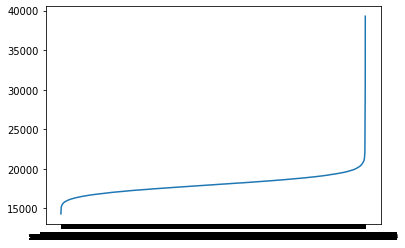

In [34]:
plt.plot(count_df['count'])

In [72]:
quant = count_df['count'].quantile(q=0.9)

percent = 20
factor = 1+percent/100

print(quant, factor*quant)

exclude = count_df[count_df['count'] >= factor*quant]

print(exclude.shape[0])
exclude

19328.0 23193.6
19


,count
sub-5894417,23280
sub-2809323,23440
sub-1897786,24292
sub-4517280,24436
sub-2247652,24786
sub-1195093,24839
sub-4485612,24937
sub-2100108,25529
sub-4635239,25534
sub-4220393,25651


In [73]:
exclude.to_csv("./bad_qc.csv")

In [99]:
count_df = count_df[~count_df.index.isin(exclude.index)]
count_df

,count
sub-2859308,14277
sub-5201474,14333
sub-2967866,14438
sub-2707712,14502
sub-4770610,14590
sub-4897231,14609
sub-2724047,14734
sub-3387900,14736
sub-2562798,14816
sub-1082411,14825


In [24]:
n_subjects = 1114

least_folded_sub = count_df.iloc[0:n_subjects,:].index
most_folded_sub = count_df.iloc[-n_subjects:,:].index

print(least_folded_sub)
print(most_folded_sub)

Index(['sub-2859308', 'sub-5201474', 'sub-2967866', 'sub-2707712',
       'sub-4770610', 'sub-4897231', 'sub-2724047', 'sub-3387900',
       'sub-2562798', 'sub-1082411',
       ...
       'sub-3882121', 'sub-2371387', 'sub-2697979', 'sub-4746824',
       'sub-2426840', 'sub-5729360', 'sub-1160063', 'sub-2123483',
       'sub-4794197', 'sub-1458379'],
      dtype='object', length=1114)
Index(['sub-4469507', 'sub-3784604', 'sub-1959785', 'sub-5531966',
       'sub-5079960', 'sub-2917814', 'sub-4894505', 'sub-4714473',
       'sub-6009541', 'sub-5519409',
       ...
       'sub-3396940', 'sub-2955962', 'sub-2718550', 'sub-5894417',
       'sub-2809323', 'sub-1897786', 'sub-4517280', 'sub-2247652',
       'sub-1195093', 'sub-4485612'],
      dtype='object', length=1114)


In [25]:
least_folded_sub = pd.DataFrame(least_folded_sub, columns=['Subject'])
most_folded_sub = pd.DataFrame(most_folded_sub, columns=['Subject'])

In [26]:
least_folded_sub.to_csv("./least_folded_1114.csv", index=False)
most_folded_sub.to_csv("./most_folded_1114.csv", index=False)

## Generate QC file UKB

In [77]:
save_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank"

missing_R_graphs = pd.read_csv(save_path+'/missing_R_graphs.csv', index_col=0, header=None)
too_many_voxels = pd.read_csv(save_path+'/too_many_voxels.csv', index_col=0)

In [78]:
# initializing

index = np.concatenate([count_df.index.values, missing_R_graphs.index.values])

qc_df = pd.DataFrame(columns=['qc', 'comments'], index=index)
qc_df = qc_df.assign(qc=1)
qc_df = qc_df.assign(comments='')

qc_df

,qc,comments
sub-2859308,1,
sub-5201474,1,
sub-2967866,1,
sub-2707712,1,
sub-4770610,1,
sub-4897231,1,
sub-2724047,1,
sub-3387900,1,
sub-2562798,1,
sub-1082411,1,


In [96]:
qc_df.loc[missing_R_graphs.index, 'qc'] = 0
qc_df.loc[missing_R_graphs.index, 'comments'] = 'missing R graph'

qc_df.loc[too_many_voxels.index, 'qc'] = 0
qc_df.loc[too_many_voxels.index, 'comments'] = 'too many voxels (more than 1.2 x 90th quantile)'

qc_df

,qc,comments
sub-2859308,1,
sub-5201474,1,
sub-2967866,1,
sub-2707712,1,
sub-4770610,1,
sub-4897231,1,
sub-2724047,1,
sub-3387900,1,
sub-2562798,1,
sub-1082411,1,


In [98]:
qc_df.to_csv(save_path+'/qc.tsv', sep='\t')

## Generate UKB subset

In [3]:
count_df = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/UKB_count_voxels.csv", index_col=0)
count_df

,count
sub-2859308,14277
sub-5201474,14333
sub-2967866,14438
sub-2707712,14502
sub-4770610,14590
...,...
sub-2444304,29028
sub-4497921,30180
sub-2562650,31391
sub-2354702,36342


In [7]:
milieu = int(count_df.shape[0]/2)
print(milieu)

size = 551

indices = range(int(milieu - size/2), int(milieu + size/2))
print((indices))
if len(indices) == size:
    subset_subjects = count_df.iloc[indices,:].index

subset_subjects

10536
range(10260, 10811)


Index(['sub-5832389', 'sub-5786437', 'sub-4913005', 'sub-3619215',
       'sub-3546706', 'sub-4581847', 'sub-5642476', 'sub-3767310',
       'sub-4093965', 'sub-3679498',
       ...
       'sub-5380252', 'sub-4621986', 'sub-2854300', 'sub-2230015',
       'sub-2827344', 'sub-1347343', 'sub-2598010', 'sub-2703169',
       'sub-4878783', 'sub-1479908'],
      dtype='object', length=551)

In [9]:
# save pandas file

subset_subjects_df = pd.DataFrame(subset_subjects, columns=['Subject'])
subset_subjects_df.to_csv("./mid_folded_551.csv", header=False, index=False)

# ACCpatterns

In [2]:
path2rescaled_skels = "/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/skeletons/2mm/R"

In [49]:
count_df = count_voxels(path2rescaled_skels)

0 nih_chp_02657_t1
2 nih_chp_05537_t1
3 nih_chp_04276_t1
4 nih_chp_04807_t1
9 nih_chp_05627_t1
10 e0013_t1_s03
13 sub-active25_ses-pretraining_T1w
14 a0005_t1_s03
20 sub-inhibition16_ses-pretraining_T1w
22 nih_chp_02874_t1
23 nih_chp_04640_t1
24 nih_chp_03922_t1
28 nih_chp_05147_t1
29 nih_chp_01348_t1
30 nih_chp_05225_t1
31 e0061_t1_s03
32 nih_chp_01503_t1
33 e0032_t1_s03
34 nih_chp_05711_t1
37 nih_chp_05293_t1
38 nih_chp_04578_t1
40 2-14COEEN_t0
45 nih_chp_05167_t1
46 nih_chp_00404_t1
47 nih_chp_04911_t1
48 a0006_t1_s03
53 nih_chp_00551_t1
58 2-25MATMA_t0
59 a0009_t1_02_s03
60 nih_chp_05032_t1
61 e0067_t1_s03
62 a0038_t1_s03
63 a0002_t1_s03
66 nih_chp_04768_t1
67 nih_chp_05116_t1
71 1-08ANDTI_t0
73 nih_chp_01363_t1
74 nih_chp_05126_t1
75 nih_chp_01579_t1
80 nih_chp_05517_t1
82 a0034_t1_s03
85 nih_chp_02091_t1
87 e0070_t1_s03
89 nih_chp_04815_t1
90 1-11LEBJO_t0
93 nih_chp_05117_t1
94 nih_chp_02221_t1
97 sub-inhibition25_ses-pretraining_T1w
98 nih_chp_04808_t1
100 e0065_anat_t1_s03
103 

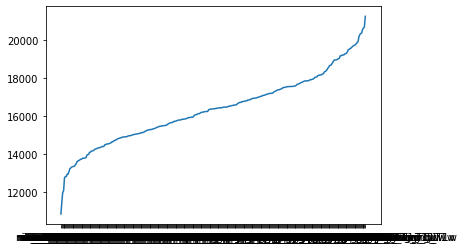

In [17]:
plt.plot(count_df['count'])
plt.show()

In [25]:
# load labels
acc_db = pd.read_csv("/neurospin/dico/agaudin/Runs/04_pointnet/Output/2022-09-01/conv_T=0.5/cingulate_ACCpatterns_embeddings/cross_val_predicted_labels.csv")

labeled_subjects = acc_db[['Subject', 'label']]
labeled_subjects.set_index('Subject', inplace=True)

cmap = {0: 'blue', 1: 'red'}

labeled_subjects['color'] = labeled_subjects['label'].map(cmap)
labeled_subjects

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,label,color
Subject,,
1-03HUBJO_t0,1,red
1-08ANDTI_t0,1,red
1-11LEBJO_t0,1,red
1-15LEHMI_t0,0,blue
1-17COLMA_t0,0,blue
1-18ROUCO_t0,0,blue
1-20FORHU_t0,0,blue
1-23CREES_t0,0,blue
1-40AYMJU_t0,1,red


In [30]:
count_df['color'] = labeled_subjects['color']
count_df

,count,color
nih_chp_01211_t1,10838,blue
nih_chp_02373_t1,11455,blue
nih_chp_05185_t1,11970,blue
nih_chp_05041_t1,12061,red
nih_chp_03880_t1,12750,red
nih_chp_04579_t1,12808,red
nih_chp_05167_t1,12809,red
nih_chp_03922_t1,12937,red
nih_chp_04963_t1,12938,blue
nih_chp_05116_t1,13071,blue


<BarContainer object of 341 artists>

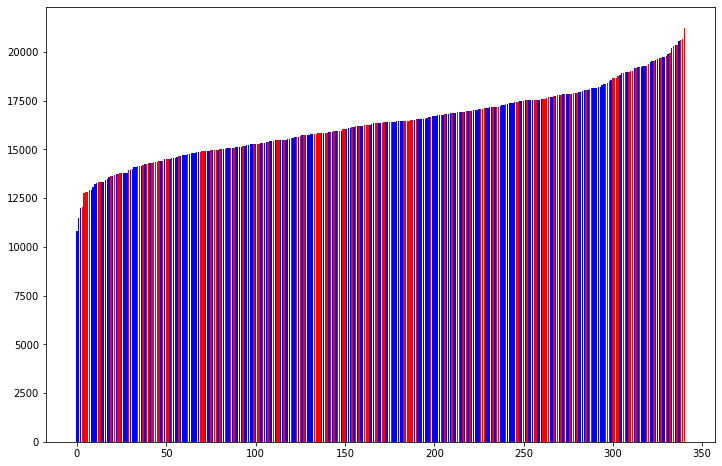

In [37]:
plt.figure(figsize=(12,8))
plt.bar(range(count_df.shape[0]), count_df['count'], color=count_df.color)

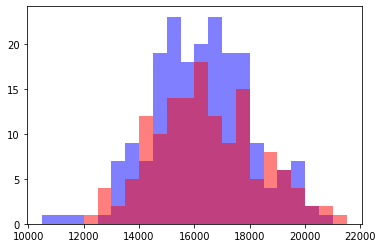

In [44]:
bins = range(10500, 22000, 500)

plt.hist(count_df[count_df.color=='blue']['count'], bins=bins, color='blue', alpha=0.5)
plt.hist(count_df[count_df.color=='red']['count'], bins=bins, color='red', alpha=0.5)
plt.show()

## count on crop

In [45]:
path2crops = "/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/crops/2mm/CINGULATE/mask/Rcrops"

In [56]:
count_df = count_voxels(path2crops, dtype='crop')
count_df

2 sub-inhibition28_ses-pretraining_T1w
3 sub-active18_ses-pretraining_T1w
4 nih_chp_00404_t1
5 nih_chp_03961_t1
6 nih_chp_05069_t1
7 e0042_t1_s03
8 sub-active08_ses-pretraining_T1w
10 a0034_t1_s03
11 e0021_t1_s03
12 a0040_t1_s03
13 nih_chp_03202_t1
14 nih_chp_04195_t1
16 nih_chp_04438_t1
17 nih_chp_04854_t1
21 nih_chp_05344_t1
24 nih_chp_04910_t1
26 nih_chp_03908_t1
27 nih_chp_01055_t1
33 nih_chp_05116_t1
34 nih_chp_05517_t1
40 nih_chp_05716_t1
42 nih_chp_02741_t1
47 a0004_t1_s03
48 nih_chp_01078_t1
49 nih_chp_04053_t1
50 nih_chp_05293_t1
52 a0026_t1_s03
53 nih_chp_04808_t1
54 sub-active15_ses-pretraining_T1w
55 1-18ROUCO_t0
57 nih_chp_02221_t1
58 a0036_t1_s03
59 a0018_t1_s03
60 nih_chp_05066_t1
63 nih_chp_01052_t1
64 nih_chp_04701_t1
67 nih_chp_04338_t1
68 sub-active02_ses-pretraining_T1w
70 nih_chp_04144_t1
71 nih_chp_05404_t1
73 a0010_t1_s03
75 nih_chp_01967_t1
77 nih_chp_04667_t1
78 nih_chp_05127_t1
80 2-29PIEMA_t0
81 1-11LEBJO_t0
82 nih_chp_01911_t1
83 nih_chp_02769_t1
84 e0039_t1

,count
sub-active08_ses-pretraining_T1w,341
nih_chp_03880_t1,384
sub-inhibition28_ses-pretraining_T1w,424
nih_chp_01211_t1,429
sub-active19_ses-pretraining_T1w,553
nih_chp_02373_t1,558
nih_chp_04579_t1,564
sub-inhibition01_ses-pretraining_T1w,577
nih_chp_05167_t1,577
nih_chp_05625_t1,579


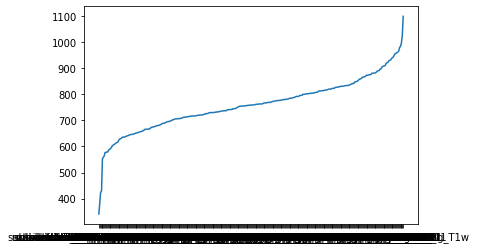

In [57]:
plt.plot(count_df['count'])
plt.show()